In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [2]:
# Numpy 배열로도 입력을 받고 싶으면,
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [3]:
# Numpy에서 활용되는 트릭
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
y = x > 0
print(y)

[False  True  True]


In [5]:
y = y.astype(np.int)
print(y)

[0 1 1]


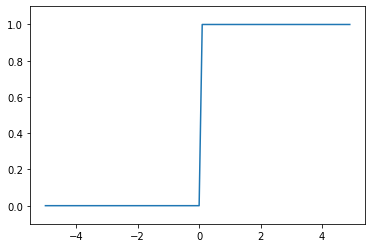

In [6]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

## 3.2.4 시그모이드 함수 구현하기

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [8]:
# numpy의 브로드캐스트
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [9]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

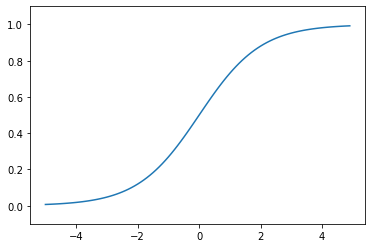

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

## 3.2.7 ReLU 함수(Rectified Linear Unit)

In [11]:
def relu(x):
    return np.maximum(0, x)

## 3.3.1 다차원 배열

In [12]:
import numpy as np
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))
A.shape
A.shape[0]

[1 2 3 4]
1


4

In [13]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)
print(np.ndim(B))
B.shape

[[1 2]
 [3 4]
 [5 6]]
2


(3, 2)

## 3.3.2 행렬의 곱

In [14]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.dot(A,B)

array([[19, 22],
       [43, 50]])

## 3.3.3 신경망에서의 행렬 곱

In [16]:
X = np.array([1,2])
X.shape

(2,)

In [17]:
W = np.array([[1,3,5], [2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [18]:
W.shape

(2, 3)

In [19]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


In [25]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


In [28]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [30]:
# 1층에서 2층으로 넘어가는 과정
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3, )
print(W2.shape) # (3, 2)
print(B2.shape) # (2, )

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [32]:
# 2층에서 출력층으로의 전달
# 출력층의 구현도 그동안의 구현과 거의 같다. 딱 하나, 활성화 함수만 지금까지의 은닉층과 다르다.
def identify_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identify_function(A3) # 혹은 Y = A3
print(Y)

[0.31682708 0.69627909]


## 3.4.3 구현 정리

In [35]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identify_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5.1 항등 함수와 소프트맥스 함수 구현하기

In [36]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) # 지수 함수
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [38]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [39]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [40]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

## 3.5.2 소프트맥스 함수 구현 시 주의점

In [41]:
# 오버플로 문제를 해결하기 위해 C라는 임의의 정수를 분자와 분모 양쪽에 곱한다.
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) # 소프트맥스 함수의 계산 -> 제대로 계산되지 않는다.

<ipython-input-41-df8cc25774d8>:3: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a)) # 소프트맥스 함수의 계산 -> 제대로 계산되지 않는다.
<ipython-input-41-df8cc25774d8>:3: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a)) # 소프트맥스 함수의 계산 -> 제대로 계산되지 않는다.


array([nan, nan, nan])

In [42]:
c = np.max(a) # c = 1010 (최댓값)

In [43]:
a - c

array([  0, -10, -20])

In [44]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [45]:
# 위를 바탕으로 소프트맥스 함수 다시 구현
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

## 3.5.3 소프트맥스 함수의 특징

: 소프트맥스 함수 출력의 총합은 1이다.(`중요`)

In [46]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [47]:
np.sum(y)

1.0

: 이 성질 덕분에 소프트맥스 함수의 출력을 '확률'로 해석할 수 있다.

# 22.02.10 목

## 3.6 손글씨 숫자 인식

In [48]:
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

# 처음 한 번은 몇 분 정도 걸립니다.
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# rkr xpdlxjdml gudtkd cnffur
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000,)
print(x_test.shape) # (10000, 784)
print(t_test.shape) # (10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [49]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label) # 5

print(img.shape) #(784,)
img = img.reshape(28, 28) # 원래 이미지의 모양으로 변형
print(img.shape) # (28, 28)

img_show(img)

5
(784,)
(28, 28)


## 3.6.2 신경망의 추론 처리

In [52]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label = False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'],network['W2'],network['W3']
    b1, b2, b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [53]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy: " + str(float(accuracy_cnt)/len(x)))

Accuracy: 0.9352


## 3.6.3 배치 처리

In [54]:
x, _ = get_data()

In [55]:
network = init_network()

In [56]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [57]:
x.shape

(10000, 784)

In [58]:
x[0].shape

(784,)

In [61]:
print(W1.shape)
print(W2.shape)
print(W3.shape)

(784, 50)
(50, 100)
(100, 10)


In [62]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


In [64]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3],[0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]


In [66]:
y = np.array([1,2,1,0])
t = np.array([1,2,0,0])
print(y == t)
np.sum(y == t)

[ True  True False  True]


3

## 4.2.1 평균 제곱 오차

In [67]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t) ** 2)

In [68]:
# 정답은 '2'
t = [0,0,1,0,0,0,0,0,0,0]

# 예1 : '2'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [69]:
# 예2 : '7'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

In [70]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [72]:
# 정답은 '2'
t = [0,0,1,0,0,0,0,0,0,0]

# 예1 : '2'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [73]:
# 예2 : '7'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

## 4.2.3 미니배치 학습

In [74]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

(60000, 784)
(60000, 10)


In [75]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [76]:
np.random.choice(60000, 10)

array([50586, 14188, 23817, 35194,  5076, 12374, 59894, 12125,  1202,
       45330])

In [79]:
# y가 1차원이라면, 즉 데이터 하나당 교차 엔트로피 오차를 구하는 경우는 reshape 함수로 데이터의 형상을 바꿔준다.
# 레이블이 원-핫 인코딩일 때,
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [81]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batchsize = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7) / batch_size)

## 4.3 수치 미분

In [84]:
# 나쁜 구현 예
def numerical_diff(f, x):
    h = 10e-50 # 반올림 오차 발생
    return (f(x + h) - f(x)) / h

In [86]:
# 중앙 차분 활용
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

## 4.3.3 편미분

In [87]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

In [88]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

# 4.4 기울기(Gradient)

In [89]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [90]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [92]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [93]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

In [96]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        
    return x

In [97]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [98]:
# 학습률이 너무 큰 예 : lr=10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [99]:
# 학습률이 너무 작은 예 : lr=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

## 4.4.2 신경망에서의 기울기

In [125]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [126]:
net = simpleNet()

In [127]:
print(net.W)

[[ 0.36516061  0.11548248  0.6337502 ]
 [ 0.76078374 -0.01067852  0.12897368]]


In [128]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[0.90380173 0.05967882 0.49632644]


In [129]:
np.argmax(p) # 최댓값의 인덱스

0

In [130]:
t = np.array([0,0,1]) # 정답 레이블

In [131]:
net.loss(x, t)

1.1471539824735115

In [132]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.28636035  0.12311613 -0.40947648]
 [ 0.42954052  0.18467419 -0.61421471]]


In [133]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)